In [10]:
import importlib
import numpy as np

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

import gridify as gy
importlib.reload(gy)

import construct_merge_tree as cmt
importlib.reload(cmt)

import cluster_ambiguity as ca
importlib.reload(ca)


<module 'cluster_ambiguity' from '/home/hj/cluster-ambiguity/src/cluster_ambiguity.py'>

In [3]:
X, y = load_digits(return_X_y=True)
X_tsne = TSNE(n_components=2).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

/home/hj/anaconda3/envs/cambiguity/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hj/anaconda3/envs/cambiguity/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


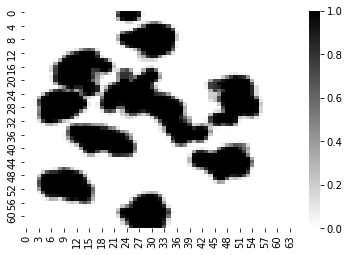

In [3]:
X_tsne_grid = gy.gridify(X_tsne, 0.2, 30, 1024, 64)
sns.heatmap(X_tsne_grid, cmap='binary')

plt.show()

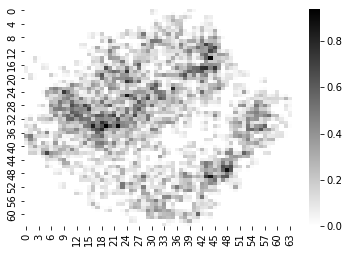

In [22]:
X_pca_grid = gy.gridify(X_pca, 0.2, 10, 1024, 64)
sns.heatmap(X_pca_grid, cmap='binary')

plt.show()

In [ ]:
X_tsne_grid = gy.gridify(X_tsne, 0.2, 30, 1024, 64)
merget = cmt.construct_merge_tree(X_tsne_grid)

print(merget.nodes)

In [ ]:
X_tsne_grid = gy.gridify(X_tsne, 0.2, 30, 1024, 64)
merget = cmt.construct_merge_tree(X_tsne_grid)

# print(merget.get_nodes())

node_ids = merget.get_node_ids_with_childs()

# print(node_ids)

for node_id in node_ids:
	area = merget.get_node_area(node_id)
	coords = merget.get_node_coords(node_id)
	# print(len(coords))
	# print(np.sum(area))
	draw_grid = X_tsne_grid * area
	sns.heatmap(draw_grid, cmap='binary') 
	plt.show()
	plt.clf()

In [8]:
X_tsne_grid = gy.gridify(X_tsne, 0.2, 30, 1024, 64)

clambs = ca.ClusterAmbiguity(X_tsne_grid, 0.2, 30, 1024, 64)


[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 181]


{181: {65: {},
  69: {},
  85: {66: {},
   84: {74: {},
    83: {81: {},
     82: {80: {72: {},
       79: {75: {73: {}, 71: {}}, 78: {76: {68: {}, 70: {}}, 77: {}}}},
      67: {}}}}}}}